In [1]:
# Custome Dataset NoteBook
#-----------------------------------------------------

# Depending on what you are working on, vision, text, audio, recommendation, you will want to look into each of pytorch libraries for existing data 
# loading functions and customizable data loading functions

In [2]:
# 0. importing pytorch and setting up device-agnostic code

import torch
from torch import nn

#Note: PyTorch 1.10.0+ is required for this course
torch.__version__

'2.1.0+cu118'

In [3]:
# set up the device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
# 1. get data
# Our dataset is a subset of the food 101 dataset 
# food 101 starts 101 different classes of food.
# our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing).

#----- why do this ? --------------

# When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary. 

# The whole point is to speed up how fast you can experiment

In [5]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists... skipping download")
else:
    print(f"{image_path} does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    # download pizzaa, steak, sushi dat
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak and sushi data...")
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory already exists... skipping download


In [6]:
## 2. Becoming one with the data (data preparation and data exploration)
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its content"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")


In [7]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'


In [8]:
# set up train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [9]:
#2.1 Visualizing and image
# -- Lets write some code:
# 1. Get all of the image paths
# 2. Pick a radom image path using Python's random.choice()
# 3. Get the image class name using `pathlib.Path.parent.stem`
# 4. Since we are working with images, lets open the image with Ptthon's with python's PIL
# 5. We will then show the image and print metadata

The random image file name we choiced: [data\pizza_steak_sushi\train\pizza\2382016.jpg]
The Class name of the random image file we choiced [pizza]
Image height: 512
Image width: 512


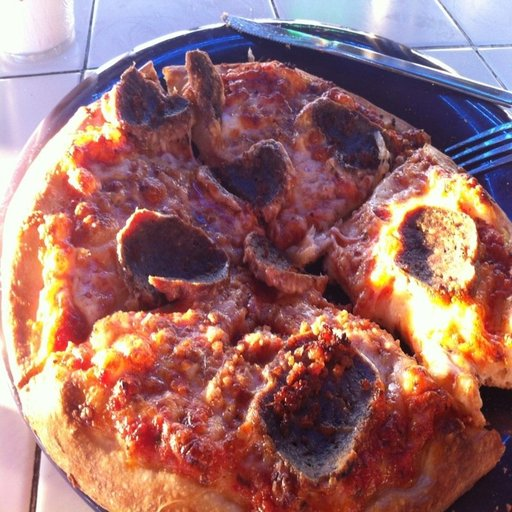

In [10]:
import random
from PIL import Image
# Set seed 
# random.seed(42)

# 1. Get all iamge paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. pick a random image paths
random_image_path = random.choice(image_path_list)

# 3. Get the image class name using `pathlib.Path.parent.stem`
image_class = random_image_path.parent.stem

# 4. Since we are working with images, lets open the image with Ptthon's with python's PIL
img = Image.open(random_image_path)

# 5. print the metadata
print(f"The random image file name we choiced: [{random_image_path}]")
print(f"The Class name of the random image file we choiced [{image_class}]")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Text(0.5, 1.0, 'Image class: pizza | Image shape: (512, 512, 3) -> [height, width, color_channels]')

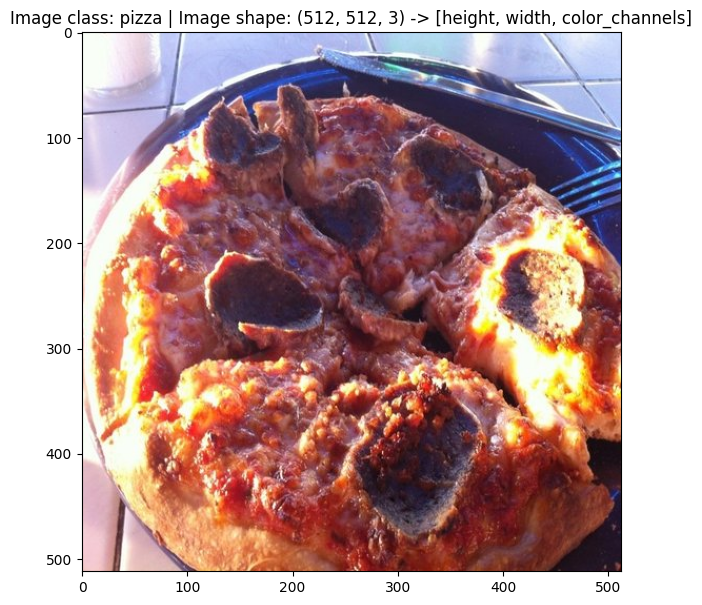

In [11]:
import numpy as np 
import matplotlib.pyplot as plt

# Turn the image into array [IMPORTANT]
image_as_array = np.asarray(img)
# plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(f"Image class: {image_class} | Image shape: {image_as_array.shape} -> [height, width, color_channels]")

In [12]:
## 3. Transforming data into the tensor format
# Before we can use our image data with pytorch:
# 1. Turn your target data into tensors (in our case, numerical representation of our images).
# 2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DAtaLoader`, 
#    we'll call these `Dataset` and `DataLoader`.

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [14]:
# 3.1 transforming data with [torchvision.transforms]
# -- Write a transform for image --
# ?? nn.sequential Vs. transforms.Compose?? 
data_transform = transforms.Compose([
    # Resize our images to 64 x 64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [15]:
transformed_data = data_transform(img)
transformed_data

tensor([[[0.9765, 0.9765, 0.9725,  ..., 0.8431, 0.8118, 0.8039],
         [0.9765, 0.9765, 0.9725,  ..., 0.8196, 0.8039, 0.7922],
         [0.9765, 0.9765, 0.9725,  ..., 0.7843, 0.7843, 0.7765],
         ...,
         [0.9608, 0.9569, 0.9137,  ..., 0.1294, 0.1333, 0.1333],
         [0.9569, 0.9569, 0.9098,  ..., 0.1333, 0.1373, 0.1529],
         [0.9529, 0.9569, 0.9098,  ..., 0.1608, 0.1804, 0.2784]],

        [[0.9961, 0.9961, 0.9843,  ..., 0.8941, 0.8706, 0.8627],
         [0.9961, 0.9961, 0.9961,  ..., 0.8706, 0.8627, 0.8471],
         [0.9961, 0.9961, 0.9961,  ..., 0.8392, 0.8392, 0.8353],
         ...,
         [0.7961, 0.7922, 0.7333,  ..., 0.0824, 0.0824, 0.0824],
         [0.7922, 0.7882, 0.7176,  ..., 0.0863, 0.0902, 0.0980],
         [0.7922, 0.7882, 0.7176,  ..., 0.0980, 0.1059, 0.1490]],

        [[0.9686, 0.9686, 0.9608,  ..., 0.9882, 0.9882, 0.9882],
         [0.9686, 0.9686, 0.9686,  ..., 0.9882, 0.9882, 0.9843],
         [0.9686, 0.9686, 0.9647,  ..., 0.9804, 0.9804, 0.

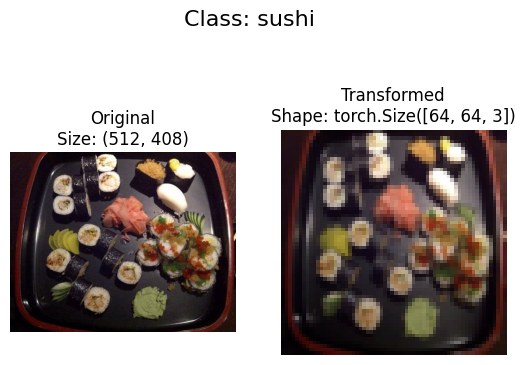

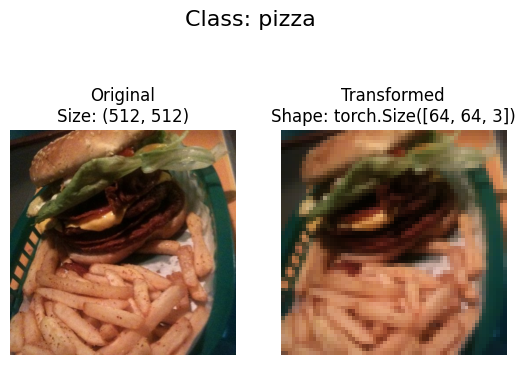

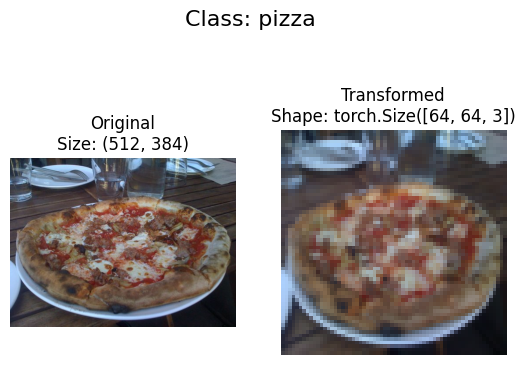

In [16]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """
    Selects random images from a path of images and loads/transforms 
    then then plots the orginal vs the transformed version.
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # we will need to change shape for the mat
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)

plot_transformed_images(image_paths=image_path_list,
                       transform=data_transform,
                       n=3,
                       seed=42)

In [33]:
## 4. Option 1 : Loading image data using [ImageFolder]

# We can load image classification data using `torchvision.datasets.ImageFolder`

# https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html

In [18]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                transform=data_transform, # a transform for the data
                                target_transform=None) # a transform for the label/target

test_data = datasets.ImageFolder(root=test_dir,
                                transform= data_transform,
                                target_transform=None)

print(f"the train data dir: {train_dir}")
print(f"the test data dir: {test_dir}")
print("====================================================================")
print(f"Train data class: {train_data.classes}")
print(f"Train data: {train_data}")
print("====================================================================")
print(f"Test data class: {test_data.classes}")
print(f"Test data: {test_data}")

the train data dir: data\pizza_steak_sushi\train
the test data dir: data\pizza_steak_sushi\test
Train data class: ['pizza', 'steak', 'sushi']
Train data: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data class: ['pizza', 'steak', 'sushi']
Test data: Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [26]:
# Index on the train_data Dataset to get a single image and label
# train_data[0] --> [Format in Tensor array[0] && the label index [1]]

img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype:{img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Img permute: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

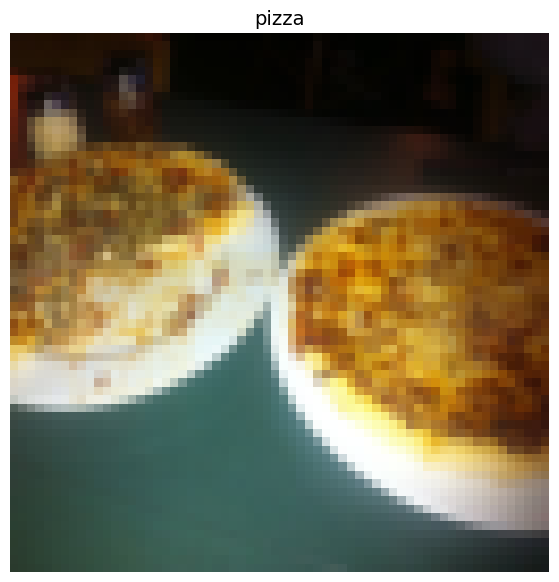

In [34]:
# rearrange the order dimensions
img_permute = img.permute(1, 2, 0)
class_names = train_data.classes
# print out differenet shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Img permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)